<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 07

Logistic regression for a binary classification with a regularization

## I. Code

### 1.Training Data

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
data    = np.genfromtxt("data07.txt", delimiter=',')
pointX  = data[:, 0] 
pointY  = data[:, 1] 
label   = data[:, 2]

pointX0 = pointX[label == 0] 
pointY0 = pointY[label == 0]
pointX1 = pointX[label == 1] 
pointY1 = pointY[label == 1]

### 2. Logistic Regression with a high dimensional feature function

### 3. Objective Function with a regularization term

In [0]:
lambda1 = 0.001
lambda2 = 0.01
lambda3 = 1

J1 = []
J2 = []
J3 = []

ACC1 =[]
ACC2 =[]
ACC3 =[]

### 4. Gradient Descent

### 5. Training

### 6. Accuracy

## II. Results

### 1. The training data
* label 0 = blue
* label 1 = red

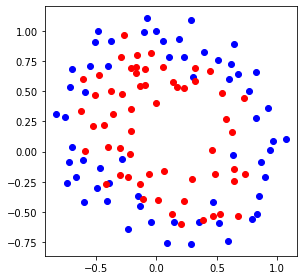

In [11]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b') 
plt.scatter(pointX1, pointY1, c='r') 
plt.tight_layout() 
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

### 2. training error with varying regularization parameters

* $\lambda_1$ =0.001 :  over-fitting is demonstrated ($J(\theta)$ in red)
* $\lambda_2$ =0.1   :  just-right is demonstrated ($J(\theta)$ in green)
* $\lambda_3$  =1    :  under-fitting is demonstrated ($J(\theta)$ in blue)

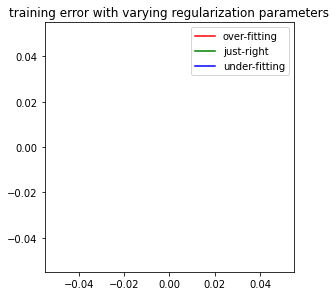

In [16]:
plt.figure()
plt.plot(J1, c='r') 
plt.plot(J2, c='g') 
plt.plot(J3, c='b') 
plt.tight_layout() 
plt.gca().set_aspect('equal', adjustable='box') 
plt.title('training error with varying regularization parameters')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

### 3. The values of the chosen regularization parameteres $\lambda$

In [22]:
print("Lambda when over-fitting  : ",lambda1)
print("Lambda when just-right    : ",lambda1)
print("Lambda when under-fitting : ",lambda1)

Lambda when over-fitting  :  0.001
Lambda when just-right    :  0.001
Lambda when under-fitting :  0.001


### 4. The training accuracy with varying regularaization parameters



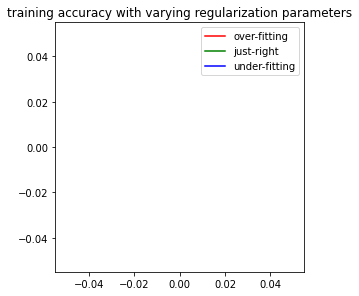

In [25]:
plt.figure()
plt.plot(ACC1, c='r') 
plt.plot(ACC2, c='g') 
plt.plot(ACC3, c='b') 
plt.tight_layout() 
plt.gca().set_aspect('equal', adjustable='box') 
plt.title('training accuracy with varying regularization parameters')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

### 5.The final training accuracy with varying regularization parameters

In [26]:
print("The training Accuracy when over-fitting  : ",ACC1[-1])
print("The training Accuracy when just-right    : ",ACC1[-1])
print("The training Accuracy when under-fitting : ",ACC1[-1])

IndexError: ignored

### 6. The optimal classifier with varying regularization parameters superimposed on the training data

